In [50]:
import numpy as np
import matplotlib.pyplot as plt

#set size of fonts in graphs
plt.rcParams.update({'font.size':14}) 

In [51]:
laser_wavelength = 632.8e-9 #nanometer
distance_wall = 5.618 #metres

In [52]:
#calculate angle of incidence and angle of diffraction
def CalcTheta(X,L):
    theta = np.arctan(X/L)
    return (theta)

def CalcR(dX,L):
    r = np.arctan(dX/L)
    return (r)

#both are correct with values given in meters and returning values in radians

In [53]:
#calculate sigma
def CalcQ(r,theta, lamda):
    return ( (2*np.pi) / lamda) * np.sin(r/2) *(np.sin(theta - r/2)+np.sin(theta + r/2) )

def CalcSigma(frequency, density,q):
    sigma = ( 4*(np.pi**2)*(frequency**2)*(density) ) / (q**3)
    return sigma

In [54]:
#for loop calculates sigma (surface tension) of liquid for frequencies x Hz - y Hz
def RunSurfTension(laser_height,density, data):

    sigma = []
    freq = []

    for i in data:

        f = i[0]
        dx = i[1] / 100

        R = CalcR(dx,distance_wall)
        T = CalcTheta(laser_height,distance_wall)
        Q = CalcQ(R,T, laser_wavelength)

        freq.append(f)
        sigma.append(CalcSigma(f, density, Q))

    average_sigma_water = np.average(sigma)

    return (average_sigma_water)


In [96]:
#water
laser_height_water = 1.91 - 1.14 #in m
density_water = 997 #kg/m3

d_water = [[200,1.01],[210,1.2],[220,1.2],[230,1.3],[240,1.3],[250,1.4],[260,1.5],[270,1.5],[280,1.55],[390,1.9],[430,1.95]] #seperation in cm, frequency in hertz

water_surface_tension = RunSurfTension(laser_height_water,density_water,d_water)
print(water_surface_tension)

0.07124431473490438


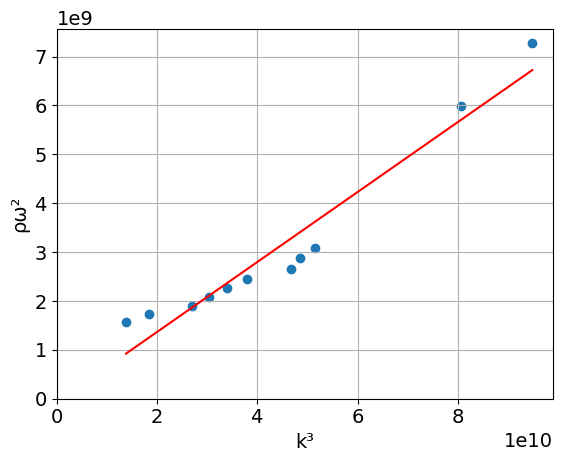

0.0716429061865285 -67550501.38555409


In [149]:
d_water = [[200,1.0],[210,1.1],[220,1.25],[230,1.3],[240,1.35],[250,1.4],[260,1.5],[270,1.52],[280,1.55],[390,1.8],[430,1.9]] #seperation in cm, frequency in hertz

#calculate water from graph.
water_qs = []
water_angfreqden = []

for i in d_water:
    f = i[0]
    dx = i[1] / 100

    R = CalcR(dx,distance_wall)
    T = CalcTheta(laser_height_water,distance_wall)
    Q = CalcQ(R,T, laser_wavelength)
    water_qs.append(Q**3)
    water_angfreqden.append(4*(np.pi**2)*997*(f**2))


a,b = np.polyfit(water_qs,water_angfreqden, 1)

plt.scatter(water_qs,water_angfreqden)
plt.ylabel('ρω²')
plt.xlabel('k³')
plt.grid()
plt.xlim(0)
plt.ylim(0)
plt.plot(water_qs,a*np.array(water_qs) + b, color='red')
plt.show()

print(a,b)

In [59]:
#guineass
laser_height_guineass = 1.91-1.14
density_guineass = 1009

d_guineass = [[140,1.4],[150,1.4],[160,1.2],[180,1.1],[210,1.4],[100,0.9],[110,1],[120,1]]

RunSurfTension(laser_height_guineass,density_guineass,d_guineass)


0.03990816188506277

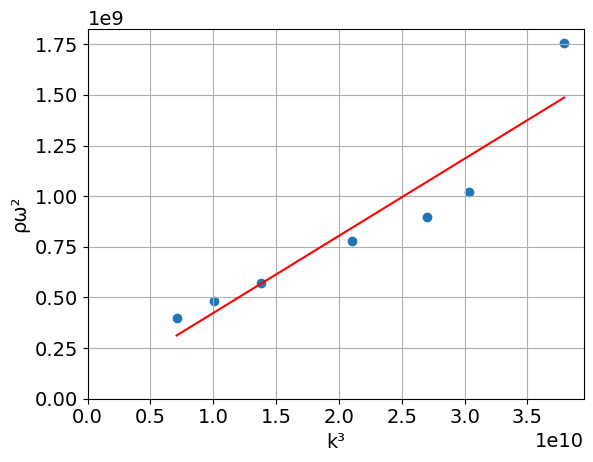

0.03807613712130397 42700422.27745355


In [150]:
d_guineass = [[100,0.8],[110,.9],[120,1],[140,1.15],[150,1.25],[160,1.3],[210,1.4]]

#calculate guineass from graph.
guineass_qs = []
guineass_angfreqden = []

for i in d_guineass:
    f = i[0]
    dx = i[1] / 100

    R = CalcR(dx,distance_wall)
    T = CalcTheta(laser_height_water,distance_wall)
    Q = CalcQ(R,T, laser_wavelength)
    guineass_qs.append(Q**3)
    guineass_angfreqden.append(4*(np.pi**2)*density_guineass*(f**2))


a,b = np.polyfit(guineass_qs,guineass_angfreqden, 1)

plt.scatter(guineass_qs,guineass_angfreqden)
plt.ylabel('ρω²')
plt.xlabel('k³')
plt.grid()
plt.xlim(0)
plt.ylim(0)
plt.plot(guineass_qs,a*np.array(guineass_qs) + b, color='red')
plt.show()

print(a,b)

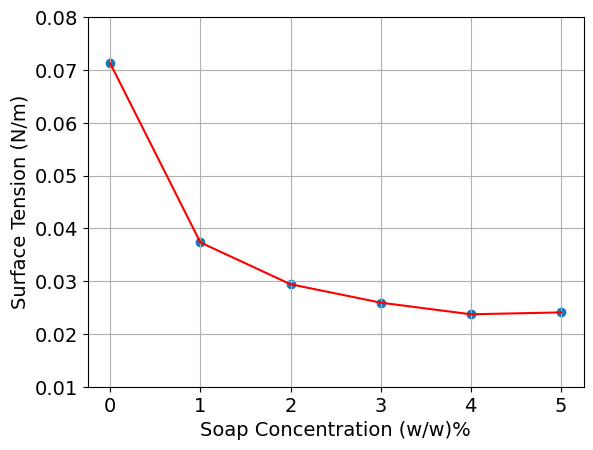

In [142]:
#soap
soap_sigmas = []
laser_height_soap = 1.92 - 1.14 #in m

d_soap_1p = [[250,1.4],[260,1.5],[270,1.7],[280,2],[290,2.1],[300,1.9],[310,2],[320,2.1],[330,2.15],[340,2.1]]
d_soap_2p = [[150,1.2],[160,1.25],[170,1.35],[180,1.4],[190,1.55],[200,1.75],[210,1.85],[220,1.9],[230,1.5]]
d_soap_3p = [[300,1.85],[310,1.9],[320,2.2],[330,2.3],[340,2.4],[350,2.55],[360,2.5],[370,2.6],[380,2.65],[390,2.65]]
d_soap_4p = [[200,1.7],[210,1.76],[220,1.8],[230,1.8],[240,1.9],[250,1.95],[260,2],[270,2],[280,2.01],[290,2.1],[300,2.2]]
d_soap_5p = [[150,1.5],[160,1.55],[170,1.6],[180,1.65],[190,1.65],[200,1.7],[210,1.7],[220,1.75],[230,1.7],[240,1.7],[250,1.8],[260,1.9],[270,2]]

soap_sigmas.append(water_surface_tension)
soap_sigmas.append(RunSurfTension(laser_height_soap,density_water,d_soap_1p))
soap_sigmas.append(RunSurfTension(laser_height_soap,density_water,d_soap_2p))
soap_sigmas.append(RunSurfTension(laser_height_soap,density_water,d_soap_3p))
soap_sigmas.append(RunSurfTension(laser_height_soap,density_water,d_soap_4p))
soap_sigmas.append(RunSurfTension(laser_height_soap,density_water,d_soap_5p))

#concentration of soap
soap_concentrations = np.arange(0,6,1)
a,b = np.polyfit(soap_concentrations,soap_sigmas, 1)
a = float(a)
b = float(b)

plt.scatter(soap_concentrations,soap_sigmas)
plt.ylabel('Surface Tension (N/m)')
plt.xlabel('Soap Concentration (w/w)%')
plt.grid()
plt.ylim(.01,.08)
#plt.plot(soap_concentrations,a*np.array(soap_concentrations) + b, color='red')
plt.plot(soap_concentrations,soap_sigmas, color='red')
plt.show()

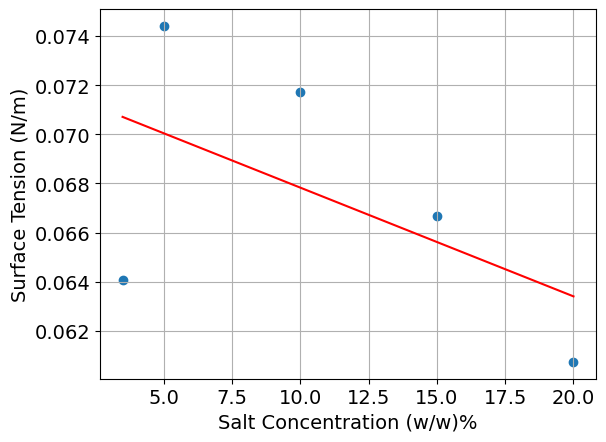

In [144]:
#salt
salt_sigmas = []

laser_height_salt = 1.81 - 1.14 #in m #1.81

#d_salt_20p = [[200,1.4],[210,1.6],[220,1.7],[230,1.6],[240,1.7],[250,1.71],[260,1.7],[270,1.9],[280,2],[290,2],[300,2.1]]
#d_salt_15p = [[200,1.4],[210,1.5],[220,1.6],[230,1.5],[240,1.6],[250,1.6],[260,1.6],[270,1.7],[280,1.7],[290,1.85],[300,1.9]]
#d_salt_10p = [[210,1.3],[220,1.3],[230,1.5],[240,1.4],[250,1.34],[260,1.55],[270,1.7],[280,1.6],[290,1.6],[300,1.7],[310,1.6],[320,1.75],[330,1.9],[340,2.2]]
#d_salt_5p = [[200,1.4],[210,1.5],[220,1.6],[230,1.6],[240,1.4],[250,1.6],[260,1.7],[280,1.7],[300,1.7],[320,1.8],[160,1.2],[180,1.2]]
#d_salt_3_5p = [[200,1.4],[210,1.4],[220,1.5],[230,1.6],[240,1.6],[250,1.6],[260,1.65],[270,1.75],[280,1.8],[290,1.8]]

d_salt_20p = [[200,1.4],[300,2.1]]
d_salt_15p = [[200,1.4],[300,1.9]]
d_salt_10p = [[210,1.3],[340,2.2]]
d_salt_5p = [[200,1.4],[180,1.2]]
d_salt_3_5p = [[200,1.4],[290,1.8]]

density_salt_20p = 1161
density_salt_15p = 1118
density_salt_10p = 1077
density_salt_5p = 1037
density_salt_3_5p = 1026

salt_sigmas.append(RunSurfTension(laser_height_salt,density_salt_3_5p,d_salt_3_5p))
salt_sigmas.append(RunSurfTension(laser_height_salt,density_salt_5p,d_salt_5p))
salt_sigmas.append(RunSurfTension(laser_height_salt,density_salt_10p,d_salt_10p))
salt_sigmas.append(RunSurfTension(laser_height_salt,density_salt_15p,d_salt_15p))
salt_sigmas.append(RunSurfTension(laser_height_salt,density_salt_20p,d_salt_20p))

#concentration of salt
salt_concentrations = [3.5,5,10,15,20]
a,b = np.polyfit(salt_concentrations,salt_sigmas, 1)
a = float(a)
b = float(b)

plt.scatter(salt_concentrations,salt_sigmas)
plt.ylabel('Surface Tension (N/m)')
plt.xlabel('Salt Concentration (w/w)%')
plt.grid()
plt.plot(salt_concentrations,a*np.array(salt_concentrations) + b, color='red')
plt.show()

In [62]:
#calculate water from graph.


In [63]:
#calculate guineass from graph.